Introduction About the project

Cenimal has over 100 years of development history. We have collection of data from a survey given about movies that recorded from 1916 to 2017. Everybody know that Holywood is popular name. We hear blockbusters is released sometime, we care more things as: budget, movie genre, revenue, ratings, reviews...and something like that. From data we obtained, it can give us more 
valueable information from analysis, predict treding, statistics and machine learning knowledge. 

About the data
Files excel (.xls) given set of data movies and credits. We expect to see three below questions:
- What areas have the most influence on revenue?
- How is a movie's revenue and average score afeccted by its genre?
- What influence does release date have on revenue?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import json

In [3]:
data = pd.read_csv('tmdb_5000_movies.csv')
data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
data.shape #show shape of data frame

(4803, 20)

In [5]:
data.describe() #show counts of records, normal distribution, meam value...of number data 

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
data.info() # Show information in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
#data[data['homepage'].isnull()].head() # show 'Hompage' is null
data['homepage']=data['homepage'].fillna('NA') # Replace null value to 'NA'

#data[data['overview'].isnull()].head() # show 'overview' is null
data['overview']=data['overview'].fillna('NA') # Replace null value to 'NA'

index_null = data.index[data['release_date'].isnull()].tolist() # find out list of index 'release_date' is null and delete.
data.drop(data.index[index_null], inplace=True)

data['tagline']=data['tagline'].fillna('NA') # Replace null value to 'NA'
data['runtime']=data['runtime'].fillna(0) # Replace null value to 'NA'

data.isnull().values.any() #check for missing data

False

In [10]:
#Run line by line to check abnormal value of dataset number column 
data.revenue.value_counts() # check value of revenue
data.budget.value_counts() # check value of budget
data.popularity.value_counts() # check value of popularity
data.vote_average.value_counts() # check value of vote_average
data.vote_count.value_counts() # check value of vote_count


0       61
1       53
2       46
4       43
3       41
6       38
8       37
10      34
11      32
9       32
7       31
5       28
15      26
19      26
12      26
13      25
16      24
22      23
34      23
31      22
24      22
18      22
17      21
25      20
26      20
23      19
27      19
66      19
29      19
47      18
        ..
382      1
2435     1
2439     1
402      1
2395     1
4500     1
4524     1
2491     1
2495     1
8662     1
474      1
2399     1
4432     1
2143     1
2251     1
8428     1
1221     1
2199     1
162      1
170      1
2247     1
2263     1
4412     1
2271     1
230      1
2295     1
266      1
2359     1
314      1
2039     1
Name: vote_count, Length: 1609, dtype: int64

In [64]:
data.to_csv("tmdb_5000_movies_out.csv", index=False, encoding='utf8') #save file after cleanning data

C:\Python35\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000019C0E594A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000019C132AE80>]], dtype=object)

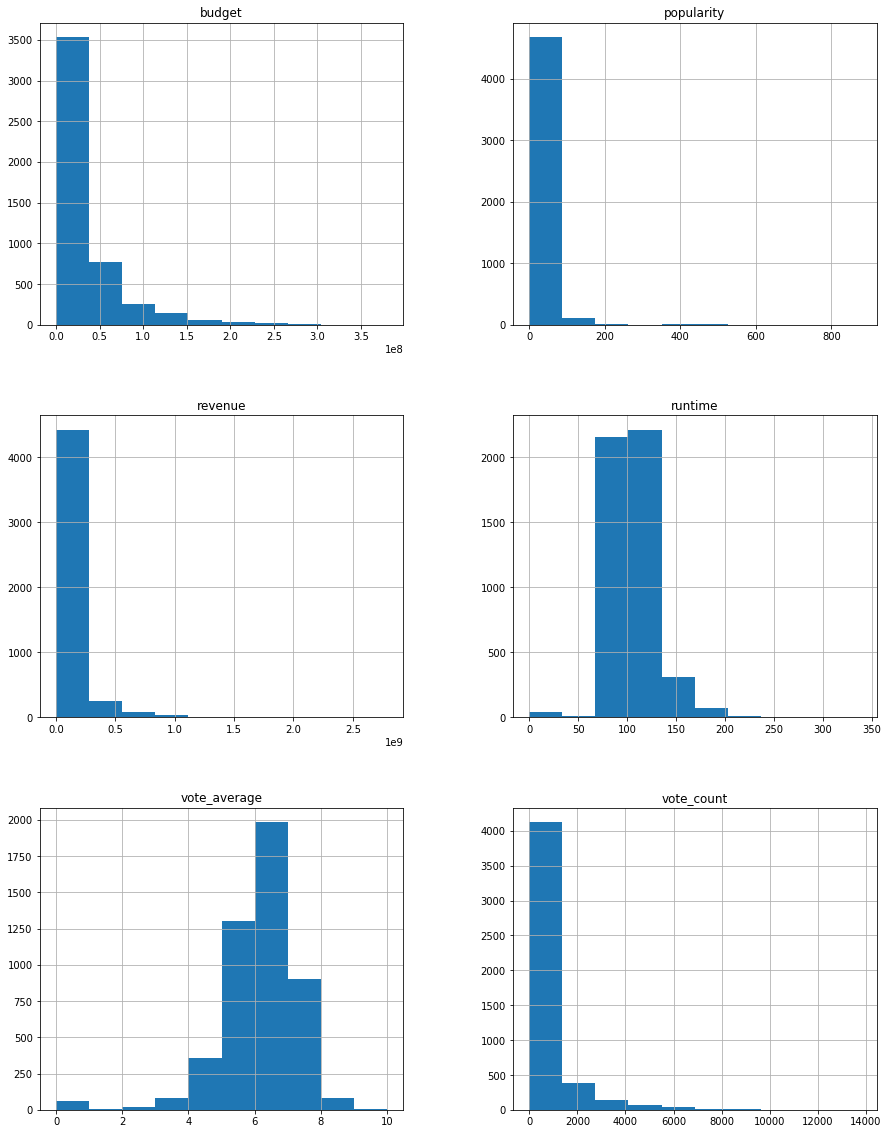

In [7]:
selectedCols = ['budget','popularity','revenue','runtime','vote_average','vote_count']

data_distribution = data[selectedCols]
data_distribution.head()
#data.hist()
#data.revenue.hist()
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_distribution.hist(ax=ax)

In [26]:
#json_cols = 'genres','keywords','production_companies','production_countries','spoken_languages'
#for c in json_cols:
#    data[c] = data[c].map(json.loads)
#
#data.head(2)
#data.info()

In [12]:
def value_update(s, d, idxes):
    for idx in idxes:
        d[idx] = s[idx]

def calculate_json_col(row, src_col, kept_cols):
    df = None
    if row[src_col]:
        df = pd.DataFrame.from_records(row[src_col])
    else:
        df = pd.DataFrame()
    if kept_cols:
        value_update(row, df, kept_cols)
    return df

def collect_json_col(src_df, src_col, kept_cols):
    return pd.concat(\
                   map(lambda x: calculate_json_col(src_df.loc[x],\
                                               src_col, kept_cols),\
                                               src_df.index),\
                   axis=0, ignore_index=True)
kept_cols = ['title', 'id']

In [13]:
genres_df = collect_json_col(data, 'genres', kept_cols)
genres_df.head(5)

,id,name,title
0,19995,Action,Avatar
1,19995,Adventure,Avatar
2,19995,Fantasy,Avatar
3,19995,Science Fiction,Avatar
4,285,Adventure,Pirates of the Caribbean: At World's End


In [ ]:
Analyst

In [14]:
genres_df['name'].value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: name, dtype: int64

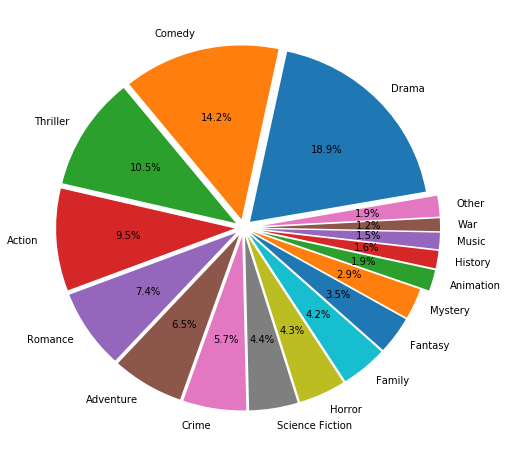

In [17]:
genres_catl = genres_df['name'].value_counts()
genres_catl = genres_catl / genres_catl.sum()
others = 0.01
genres_catlOther = genres_catl[genres_catl >= others]
genres_catlOther['Other'] = genres_catl[genres_catl < others].sum()
explode = (genres_catlOther <= 0.02) / 20 + 0.05
genres_catlOther.plot(kind='pie', label='', startangle=10, shadow=False, \
                 figsize=(8, 8), autopct="%1.1f%%", explode=explode)

In [ ]:
Draft:
2. genres nào revenue cao nhất/ít nhất
ảnh hưởng ntn dùng công cụ: vẽ correlation khảo sát sự tương quan giữa genres và revenue, average core 
dùng t-test trả lời câu hỏi revenues giữa các zone giống nhau ko?...

In [18]:
liste_genres = set()
for s in genres_df['name'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres


['Comedy',
 'Family',
 'Drama',
 'Romance',
 'Crime',
 'Music',
 'Science Fiction',
 'Thriller',
 'Foreign',
 'Action',
 'Western',
 'War',
 'Mystery',
 'Animation',
 'Adventure',
 'TV Movie',
 'Documentary',
 'Horror',
 'Fantasy',
 'History']

In [20]:
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

data['genres'] = data['genres'].apply(pipe_flatten_names)

data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'United States of America', 'iso_316...",12/10/2009,2787965087,162.0,"[{'name': 'English', 'iso_639_1': 'en'}, {'nam...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,"[{'name': 'ocean', 'id': 270}, {'name': 'drug ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'United States of America', 'iso_316...",5/19/2007,961000000,169.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,"[{'name': 'spy', 'id': 470}, {'name': 'based o...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'United Kingdom', 'iso_3166_1': 'GB'...",10/26/2015,880674609,148.0,"[{'name': 'Français', 'iso_639_1': 'fr'}, {'na...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,"[{'name': 'dc comics', 'id': 849}, {'name': 'c...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'United States of America', 'iso_316...",7/16/2012,1084939099,165.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,"[{'name': 'based on novel', 'id': 818}, {'name...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'name': 'United States of America', 'iso_316...",3/7/2012,284139100,132.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
df_reduced = data[['title','vote_average','revenue']].reset_index(drop=True)

for genre in liste_genres:
    df_reduced[genre] = data['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
df_reduced.head()

,title,vote_average,revenue,Comedy,Family,Drama,Romance,Crime,Music,Science Fiction,...,Western,War,Mystery,Animation,Adventure,TV Movie,Documentary,Horror,Fantasy,History
0,Avatar,7.2,2787965087,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Pirates of the Caribbean: At World's End,6.9,961000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Spectre,6.3,880674609,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,The Dark Knight Rises,7.6,1084939099,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,John Carter,6.1,284139100,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
mean_per_genre = pd.DataFrame(liste_genres)

#Mean revenue 
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['revenue'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])
mean_per_genre['mean_revenue']=newArray2

#Mean votes average
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['vote_average'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

mean_per_genre['mean_votes_average']=newArray2

mean_per_genre

,0,mean_revenue,mean_votes_average
0,Comedy,7.113157e+07,5.912021
1,Family,1.623466e+08,6.025341
2,Drama,5.214703e+07,6.360993
3,Romance,5.982499e+07,6.164206
4,Crime,6.643069e+07,6.276293
5,Music,4.844223e+07,6.290811
6,Science Fiction,1.525209e+08,5.964112
7,Thriller,8.110791e+07,6.019859
8,Foreign,4.214050e+05,6.141176
9,Action,1.411090e+08,6.006672


In [23]:
mean_per_genre.sort_values('mean_revenue', ascending=False).head()

,0,mean_revenue,mean_votes_average
13,Animation,2.257112e+08,6.298718
14,Adventure,2.086522e+08,6.149241
18,Fantasy,1.933259e+08,6.083726
1,Family,1.623466e+08,6.025341
6,Science Fiction,1.525209e+08,5.964112


In [ ]:
Genres 'Animation' is highest revenues

In [24]:
mean_per_genre.sort_values('mean_revenue', ascending=True).head()

,0,mean_revenue,mean_votes_average
15,TV Movie,0.000000e+00,4.562500
8,Foreign,4.214050e+05,6.141176
16,Documentary,9.915495e+06,6.081651
17,Horror,4.362754e+07,5.634875
10,Western,4.609732e+07,6.306098


In [ ]:
Genres 'TV movies' is lowest revenues

In [ ]:
Draft:
3. ngày release ảnh hưởng ntn đến revenue? ngày nào cao nhất, ngày nào thấp nhất? gthích tại sao?
cao nhất tập trug vào thời gian nào?
-> dùng count và sum

In [47]:
from datetime import datetime

t = data['release_date']
t = pd.to_datetime(t)
t = t.dt.day
df_reduced['release_days'] = t

df_reduced.head()

,title,vote_average,revenue,Comedy,Family,Drama,Romance,Crime,Music,Science Fiction,...,Animation,Adventure,TV Movie,Documentary,Horror,Fantasy,History,release_day,release_date,release_days
0,Avatar,7.2,2787965087,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2009-12-10,2009-12-10,10.0
1,Pirates of the Caribbean: At World's End,6.9,961000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2007-05-19,2007-05-19,19.0
2,Spectre,6.3,880674609,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2015-10-26,2015-10-26,26.0
3,The Dark Knight Rises,7.6,1084939099,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-07-16,2012-07-16,16.0
4,John Carter,6.1,284139100,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-03-07,2012-03-07,7.0


In [41]:
df_reduced['release_days'].value_counts()

1.0     291
25.0    199
22.0    185
11.0    185
16.0    179
13.0    176
9.0     175
21.0    172
12.0    172
10.0    171
17.0    170
15.0    166
18.0    164
20.0    162
7.0     161
6.0     150
19.0    148
14.0    148
27.0    144
5.0     141
24.0    140
8.0     139
3.0     135
23.0    135
26.0    134
30.0    127
2.0     127
4.0     120
28.0    106
29.0    100
31.0     79
Name: release_days, dtype: int64

In [ ]:
#Caculate sum by date
#continue